In [1]:
import pandas as pd
df = pd.read_csv("../data/raw_sales_data.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [2]:
df.shape

(5901, 23)

In [3]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [5]:
df.to_csv("..data/data/clean_sales_data.csv",
          index=FALSE)

NameError: name 'FALSE' is not defined

In [9]:
df.to_csv("../data/clean_sales_data.csv", index=False)

In [10]:
import sqllite3
import pandas as pd

ModuleNotFoundError: No module named 'sqllite3'

In [11]:
import sqlite3
import pandas as pd

In [12]:
conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, index=False,
          if_exists="replace")

5901

In [13]:
query = """ SELECT SUM(sales) AS total_sales FROM sales;"""
pd.read_sql(query, conn)

,total_sales
0,1.565804e+06


In [15]:
query = """ SELECT customer_Name, SUM(sales) AS total_sales FROM sales GROUP BY customer_Name ORDER BY total_sales DESC LIMIT 5; """
pd.read_sql(query, conn)

DatabaseError: Execution failed on sql ' SELECT customer_Name, SUM(sales) AS total_sales FROM sales GROUP BY customer_Name ORDER BY total_sales DESC LIMIT 5; ': no such column: customer_Name

In [16]:
query = """
SELECT Customer_Name, SUM(Sales) AS total_sales
FROM sales
GROUP BY Customer_Name
ORDER BY total_sales DESC
LIMIT 5;
"""

pd.read_sql(query, conn)

DatabaseError: Execution failed on sql '
SELECT Customer_Name, SUM(Sales) AS total_sales
FROM sales
GROUP BY Customer_Name
ORDER BY total_sales DESC
LIMIT 5;
': no such column: Customer_Name

In [17]:
query = """
SELECT Region, SUM(Sales) AS total_sales
FROM sales
GROUP BY Region
ORDER BY total_sales DESC;
"""

pd.read_sql(query, conn)

,Region,total_sales
0,West,522441.0520
1,East,450234.6660
2,Central,341007.5242
3,South,252121.0810


In [18]:
query = """
SELECT Customer_Name, SUM(Sales) AS total_sales
FROM sales
GROUP BY Customer_Name
ORDER BY total_sales DESC
LIMIT 5;
"""

pd.read_sql(query, conn)

DatabaseError: Execution failed on sql '
SELECT Customer_Name, SUM(Sales) AS total_sales
FROM sales
GROUP BY Customer_Name
ORDER BY total_sales DESC
LIMIT 5;
': no such column: Customer_Name

In [19]:
query = """
SELECT "Customer Name", SUM(Sales) AS total_sales
FROM sales
GROUP BY "Customer Name"
ORDER BY total_sales DESC
LIMIT 5;
"""

pd.read_sql(query, conn)

,Customer Name,total_sales
0,Caroline Jumper,11596.974
1,Karen Ferguson,10941.274
2,Seth Vernon,10751.148
3,Helen Wasserman,10074.934
4,Edward Hooks,9542.988


In [20]:
query = """
SELECT strftime('%Y-%m', "Order Date") AS month,
       SUM(Sales) AS total_sales
FROM sales
GROUP BY month
ORDER BY month;
"""

pd.read_sql(query, conn)

,month,total_sales
0,None,1.565804e+06


In [21]:
query = """
SELECT Region, SUM(Profit) AS total_profit
FROM sales
GROUP BY Region
ORDER BY total_profit DESC;
"""

pd.read_sql(query, conn)

,Region,total_profit
0,West,67859.9582
1,East,53400.4243
2,Central,27450.0071
3,South,26551.7163


In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

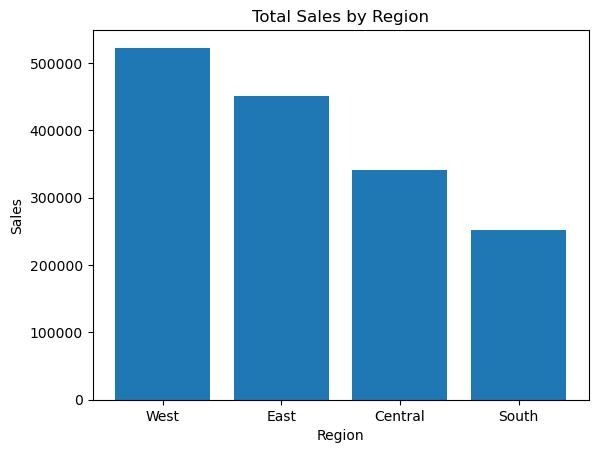

In [23]:
query = """
SELECT Region, SUM(Sales) AS total_sales
FROM sales
GROUP BY Region
ORDER BY total_sales DESC;
"""

region_sales = pd.read_sql(query, conn)

plt.figure()
plt.bar(region_sales["Region"], region_sales["total_sales"])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

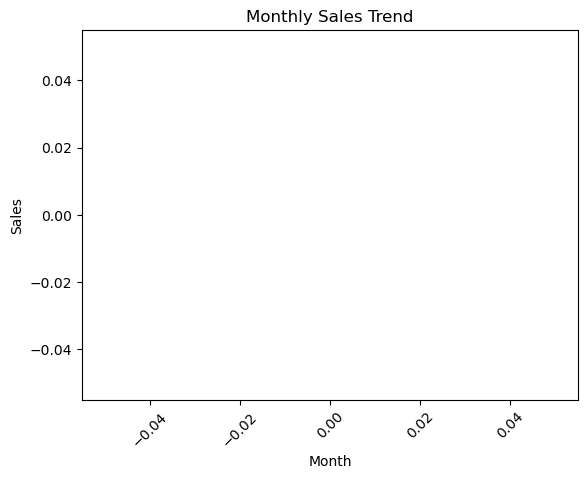

In [24]:
query = """
SELECT strftime('%Y-%m', "Order Date") AS month,
       SUM(Sales) AS total_sales
FROM sales
GROUP BY month
ORDER BY month;
"""

monthly_sales = pd.read_sql(query, conn)

plt.figure()
plt.plot(monthly_sales["month"], monthly_sales["total_sales"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

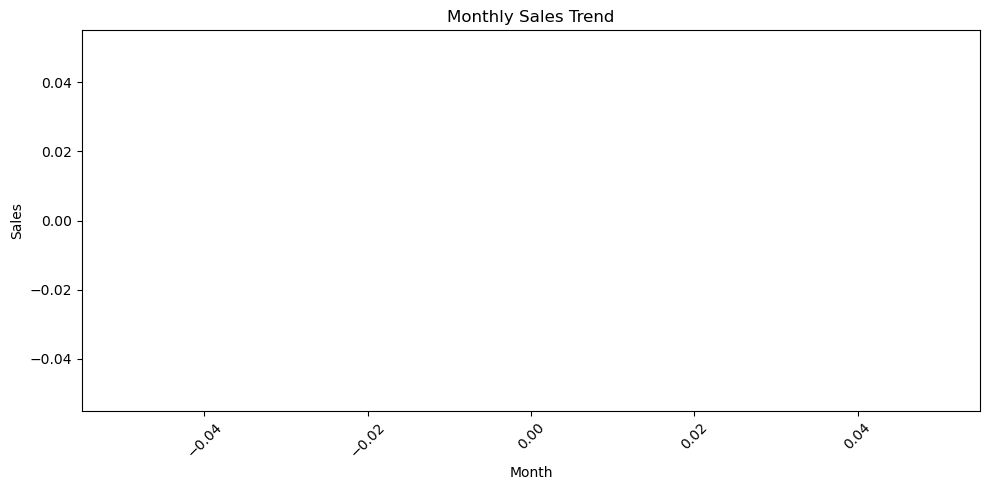

In [25]:
plt.figure(figsize=(10,5))   # make chart bigger

plt.plot(
    monthly_sales["month"],
    monthly_sales["total_sales"],
    marker='o',              # add dots
    linewidth=2              # thicker line
)

plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()